# Clusteirng Analysis

In [1]:
# Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
link = "data/2021_Alumnos_curso.csv"
data = pd.read_csv(link)
data.head()

,Curso,Nivel,Codigo,Genero,Adaptacion,Puntuacion_profesor,Puntuacion_apoyo,Material,Puntuacion_curso,Edad,Decision,Gusto_g,Interes_profesional_g,Autoeficacia_g,Utilidad_g
0,VIDEOJUEGOS 2D,0,103000,0,1,9,9,3,10,13,2,0.000000,0.000000,-0.50,-1.0
1,CIBERSEGURIDAD,1,104324,0,3,8,10,3,9,17,2,0.333333,0.000000,0.75,0.4
2,CIBERSEGURIDAD,1,106789,0,2,10,10,2,10,16,0,0.500000,0.500000,-0.75,0.4
3,BIOINGENIERIA,1,106843,1,3,10,10,3,10,15,2,0.000000,0.333333,-0.25,1.0
4,BIOINGENIERIA,0,108000,1,2,10,10,3,9,11,2,-0.166667,-0.166667,0.00,-0.2


## Pre-processing

### Keep only useful variables

In [3]:
data = data[["Nivel", "Genero", "Adaptacion", "Puntuacion_profesor", "Puntuacion_apoyo", "Material", "Puntuacion_curso", "Edad", "Decision", "Gusto_g", "Interes_profesional_g", "Autoeficacia_g", "Utilidad_g"]]
data.head()

,Nivel,Genero,Adaptacion,Puntuacion_profesor,Puntuacion_apoyo,Material,Puntuacion_curso,Edad,Decision,Gusto_g,Interes_profesional_g,Autoeficacia_g,Utilidad_g
0,0,0,1,9,9,3,10,13,2,0.000000,0.000000,-0.50,-1.0
1,1,0,3,8,10,3,9,17,2,0.333333,0.000000,0.75,0.4
2,1,0,2,10,10,2,10,16,0,0.500000,0.500000,-0.75,0.4
3,1,1,3,10,10,3,10,15,2,0.000000,0.333333,-0.25,1.0
4,0,1,2,10,10,3,9,11,2,-0.166667,-0.166667,0.00,-0.2


### Remove missing data

In [4]:
data = data.dropna()

In [5]:
# data without gender or level

In [6]:
data_red = data[["Adaptacion", "Puntuacion_profesor", "Puntuacion_apoyo", "Material", "Puntuacion_curso", "Edad", "Decision", "Gusto_g", "Interes_profesional_g", "Autoeficacia_g", "Utilidad_g"]]

## Transform Data

Mean = 0, std = 1

In [7]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data)

## K-Means Clustering

Parameters:

- **init** controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence.

- **n_clusters** sets k for the clustering step. This is the most important parameter for k-means.

- **n_init** sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

- **max_iter** sets the number of maximum iterations for each initialization of the k-means algorithm.

### Optimal number of clusters

In [8]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

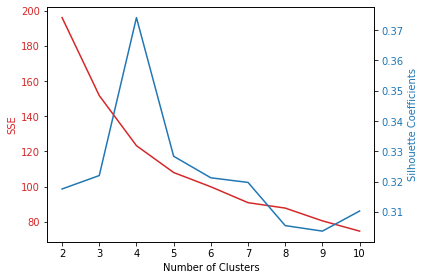

In [9]:
# plt.plot(range(2, 11), sse, silhouette_coefficients)
# plt.xticks(range(2, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
# plt.show()
x = range(2,11)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('SSE', color=color)
ax1.plot(x, sse, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette Coefficients', color=color)  # we already handled the x-label with ax1
ax2.plot(x, silhouette_coefficients, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The optimal number of clusters is 3

### Results

In [10]:
In [7]: kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42)

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_features)

KMeans(n_clusters=3)

In [12]:
data["label"] = kmeans.labels_
data.head()

,Nivel,Genero,Adaptacion,Puntuacion_profesor,Puntuacion_apoyo,Material,Puntuacion_curso,Edad,Decision,Gusto_g,Interes_profesional_g,Autoeficacia_g,Utilidad_g,label
0,0,0,1,9,9,3,10,13,2,0.000000,0.000000,-0.50,-1.0,2
1,1,0,3,8,10,3,9,17,2,0.333333,0.000000,0.75,0.4,1
2,1,0,2,10,10,2,10,16,0,0.500000,0.500000,-0.75,0.4,1
3,1,1,3,10,10,3,10,15,2,0.000000,0.333333,-0.25,1.0,0
4,0,1,2,10,10,3,9,11,2,-0.166667,-0.166667,0.00,-0.2,2


#### Cluster Centers

In [13]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns = ["Nivel", "Genero", "Adaptacion", "Puntuacion_profesor", "Puntuacion_apoyo", "Material", "Puntuacion_curso", "Edad", "Decision", "Gusto_g", "Interes_profesional_g", "Autoeficacia_g", "Utilidad_g"])
centers

,Nivel,Genero,Adaptacion,Puntuacion_profesor,Puntuacion_apoyo,Material,Puntuacion_curso,Edad,Decision,Gusto_g,Interes_profesional_g,Autoeficacia_g,Utilidad_g
0,1.000000e+00,1.000000e+00,0.833333,0.951389,0.916667,0.921875,0.882812,0.746528,0.773438,0.530839,0.438965,0.516447,0.580256
1,1.000000e+00,-4.440892e-16,0.791045,0.927032,0.873134,0.805970,0.847015,0.756219,0.712687,0.532011,0.449627,0.529851,0.559701
2,-5.551115e-16,4.159292e-01,0.811209,0.935103,0.911504,0.876106,0.895280,0.349066,0.575221,0.554495,0.474834,0.541220,0.557924


<AxesSubplot: xlabel='Genero', ylabel='Nivel'>

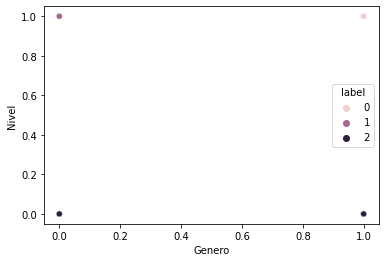

In [14]:
sns.scatterplot(x = data.Genero, y = data.Nivel, hue = data.label)
# plt.xticks(range(2, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
#plt.show()

In [15]:
# Cluster 0
data_0 = data[data.label == 0]
# sns.scatterplot(x = data.Genero, y = data.Nivel)
data_0[["Genero", "Nivel"]].value_counts()

Genero  Nivel
1       1        64
dtype: int64

In [16]:
# Cluster 1
data_1 = data[data.label == 1]
# sns.scatterplot(x = data.Genero, y = data.Nivel)
data_1[["Genero", "Nivel"]].value_counts()

Genero  Nivel
0       1        134
dtype: int64

In [17]:
# Cluster 2
data_2 = data[data.label == 2]
# sns.scatterplot(x = data.Genero, y = data.Nivel)
data_2[["Genero", "Nivel"]].value_counts()

Genero  Nivel
0       0        66
1       0        47
dtype: int64